# TP2 : Statististiques élémentaires, loi des grands nombres et intervalles de confiance

Dans ce second TP, on va s'intéresser plus en détail à des résultats classiques de statistiques, notamment en ce qui concerne l'approximmation de l'espérance d'une variable aléatoire.

Commençons par charger les bibliothèques standard dont nous aurons besoin.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## 1. Lecture graphique des quantiles sur la fonction de répartition

Reprenons ici le code du TP1 pour l'affichage de la fonction de répartition d'une loi binômiale. Un corrigé est fourni à titre indicatif mais vous pouvez également utiliser votre propre code d'affichage.

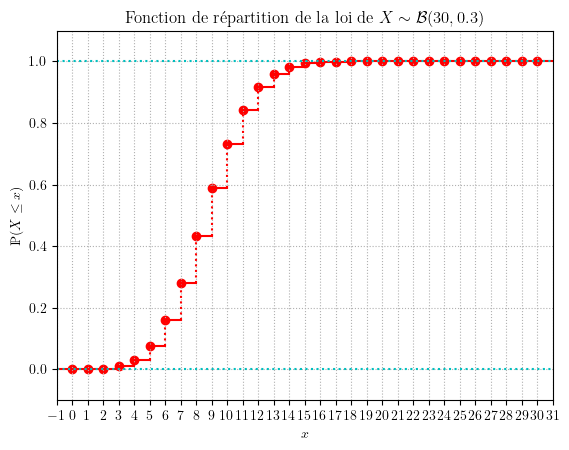

In [2]:
from math import comb
# comb(n,k) retourne le coefficient binômial « k parmi n ».

def binom(n,p,k):
    if k <= n and k >= 0 :
        return comb(n,k)*p**k*(1-p)**(n-k)
    else:
        return 0

n=30
p=.3

X = np.arange(n+1)
P = [binom(n,p,k) for k in X]

X = range(-1,n+2)
Y = [0]

# On crée les probabilités cumulées en sommant sur la distribution P déjà calculée.
for x in P:
    Y.append(Y[-1]+x)

# Permet d'afficher des formules mathématiques en légende
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Computer Modern'
plt.rcParams['text.latex.preamble'] = r'\usepackage{dsfont}'

plt.xticks(X)
plt.grid(linestyle='dotted')

# On affiche itérativement les segments.

plt.plot((X[0],X[1]),(Y[0],Y[0]),color='r')

for i in range(1,n+2):
    plt.plot((X[i],X[i]),(Y[i-1],Y[i]),color='r',linestyle='dotted')
    plt.scatter([X[i]],[Y[i]],marker='o',color='r')
    plt.plot((X[i],X[i+1]),(Y[i],Y[i]),color='r')

plt.xlim(-1,n+1)
plt.ylim(-0.1,1.1)

plt.plot([-1,n+1],[0,0],color='c',linestyle='dotted')
plt.plot([-1,n+1],[1,1],color='c',linestyle='dotted')

plt.xlabel('$x$')
plt.ylabel('$\mathds{P}(X\leq x)$')
plt.title('Fonction de répartition de la loi de $X\sim\mathcal{B}('+str(n)+','+str(p)+')$')

# Code à compléter

plt.show()

On se propose désormais de compléter le code pour afficher les droites horizontales correspondants au premier quartile, au troisième quartile et à la médiane. Comment lit-on graphiquement ces données ?

<details>
<summary><b>Cliquer ici pour afficher la réponse.</b></summary>

Il suffit de regarder où les droites horizontales traverse la fonction de répartition. Si cette droite traverse un saut de la fonction (en pointillés rouge dans la correction indicative), on considère que l'intersection a lieu à cette position.
En revanche, si notre droite tombe pile sur une partie constante de la fonction, il n'y a pas façon uniquement déterminée de choisir le quantile, et on peut arrondir à droite, à gauche ou faire une moyenne.
On fera ici le choix de convention de l'arrondi à gauche.
</details>

In [3]:
# À vous de jouer !

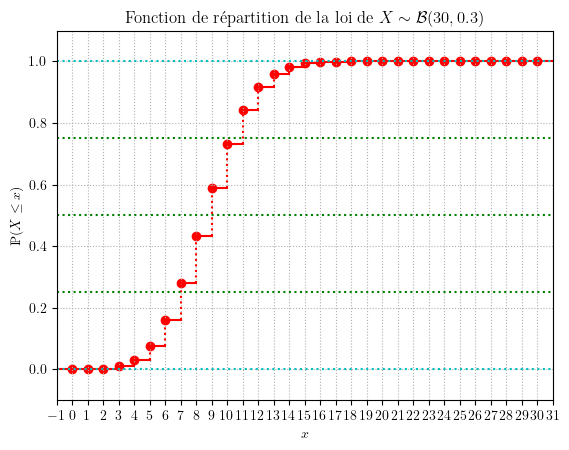

In [4]:
### Correction indicative à supprimer de la version moodle ###

plt.xticks(X)
plt.grid(linestyle='dotted')

# On affiche itérativement les segments.

plt.plot((X[0],X[1]),(Y[0],Y[0]),color='r')

for i in range(1,n+2):
    plt.plot((X[i],X[i]),(Y[i-1],Y[i]),color='r',linestyle='dotted')
    plt.scatter([X[i]],[Y[i]],marker='o',color='r')
    plt.plot((X[i],X[i+1]),(Y[i],Y[i]),color='r')

plt.xlim(-1,n+1)
plt.ylim(-0.1,1.1)

plt.plot([-1,n+1],[0,0],color='c',linestyle='dotted')
plt.plot([-1,n+1],[1,1],color='c',linestyle='dotted')

plt.xlabel('$x$')
plt.ylabel('$\mathds{P}(X\leq x)$')
plt.title('Fonction de répartition de la loi de $X\sim\mathcal{B}('+str(n)+','+str(p)+')$')

plt.plot([-1,n+1],[0.25,0.25],color='g',linestyle='dotted')
plt.plot([-1,n+1],[0.5,0.5],color='g',linestyle='dotted')
plt.plot([-1,n+1],[0.75,0.75],color='g',linestyle='dotted')

plt.show()

## 2. Étude de la loi binômiale et diagrammes en boîte à moustache

On va premièrement utiliser le module `numpy` pour étudier quelques propriétés empirique d'un échantillon aléatoire.

**Exercice :**

1. Créer un échantillon de taille `n=10` d'une loi binomiale $\mathcal{B}(30,0.3)$ dans le bloc 1.
2. Calculer sa moyenne `m1` (avec la fonction `np.average`) et son écart-type  `s1` (avec `np.std`) dans le bloc 2.
3. Calculer la liste des quartiles `Q1` (avec la fonction `np.quantile`).
4. Répéter les questions précédentes dans le bloc 3, avec un échantillon de taille $100$ (dans des variables `m2`, `s2` et `Q2`), puis $1000$ (dans des variables `m3`, `s3` et `Q3`).
5. Comparer les résultats avec la valeur théorique attendue dans le bloc 4.

In [5]:
### BLOC 1 ###

n1 = 10

def echantillon(n):
    L=[]
    # Code à compléter
    return L

L1 = echantillon(n)

In [6]:
### Correction indicative à supprimer de la version moodle ###

n1 = 10

def echantillon(n):
    L=np.random.binomial(30,0.3,n)
    return L

L1 = echantillon(n)

In [7]:
### BLOC 2 ###

m1 = None
s1 = None
Q1 = None

In [8]:
### BLOC 3 ###

n2 = 100
L2 = echantillon(n2)

m2 = None
s2 = None
Q2 = None

n3 = 10000
L3 = echantillon(n3)

m3 = None
s3 = None
Q3 = None

In [9]:
### BLOC 4 ###

Les diagrammes en boîte à moustaches (*box plot* en anglais) permettent, dans une certaine mesure, de représenter graphiquement les quantiles d'une distribution.
On peut afficher un boxplot via la fonction `plt.boxplot(L,labels=[mot])`, où `L` est un échantillon aléatoire, et `mot` le mot (optionnel) correspondant sur l'axe horizontal. Si on veut juxtaposer plusieurs boîtes, on remplacera `L` par une *liste* d'échantillons (donc une *liste de listes*), et on affectera une liste de mots à `label`.

**Exercice :**

1. Afficher le boxplot correspondant aux échantillons `L1`, `L2` et `L3` précédemment générés.
2. Afficher les droites horizontales correspondant aux valeurs théoriques des quantiles observées dans la première partie.

In [10]:
# À vous de jouer !

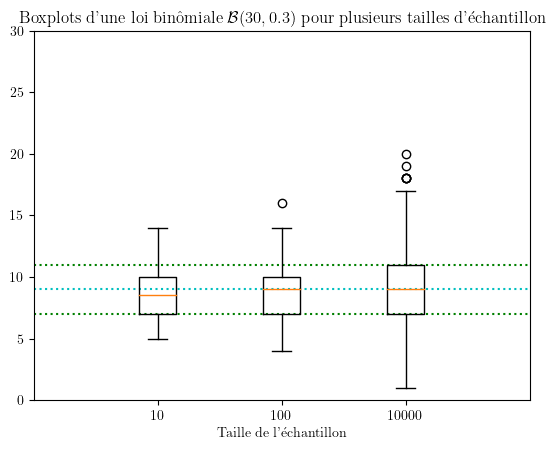

In [11]:
### Correction indicative à supprimer de la version moodle ###

L1 = echantillon(n1)
L2 = echantillon(n2)
L3 = echantillon(n3)

plt.title('''Boxplots d'une loi binômiale $\mathcal{B}(30,0.3)$ pour plusieurs tailles d'échantillon''')
plt.xlabel('''Taille de l'échantillon''')
plt.xlim(0,4)
plt.ylim(0,30)
plt.plot([0,4],[7,7],color='g',linestyle='dotted') # Q1
plt.plot([0,4],[9,9],color='c',linestyle='dotted') # Médiane
plt.plot([0,4],[11,11],color='g',linestyle='dotted') # Q3
plt.plot([])
plt.boxplot([L1,L2,L3],labels=['$'+str(n1)+'$','$'+str(n2)+'$','$'+str(n3)+'$'])
plt.show()

La boite centrale correspondant à un échantillon représente les quartiles empiriques, avec la médiane au milieu.
Ainsi, on constate que lorsque la taille de l'échantillon devient assez grande, ces quartiles semblent converger vers les valeurs théoriques attendues.

Le comportement des moustaches est un peu plus subtil. Par défaut, leur longueur est déterminée par la taille de la boite centrale et les aberrations qui en sortent sont représentés par des points. Cependant, si aucune valeur ne dépasse de la moustache dans une des directions, alors la moustache en question est raccourcie pour s'arrêter au minimum/maximum de l'échantillon. Une définition plus précise des boîtes des disponible dans [la documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

Le point à retenir est que la *taille* de la boite et de ses moustaches n'est pas un indicateur de la qualité d'approximmation, puisqu'elle aura tendance à grandir jusqu'à seuil, alors même qu'on constate empiriquement que la qualité d'approximmation des quarties *augmente* avec la taille de l'échantillon.

## 3. La méthode de Monte-Carlo

L'idée générale de la méthode de Monte-Carlo est d'estimer numériquement l'espérance d'une variable aléatoire à partir des moyennes empiriques d'un processus aléatoire. On se propose ici d'observer une version assez naïve de la méthode, basée sur la loi forte des grands nombres.

**Théorème : Loi Forte des Grands Nombres (LFGN)**

Considérons $\left(X_i\right)_{i\in\mathbb{N}^*}$ une suite de variables aléatoires réelles iid et intégrables, c'est-à-dire $\mathbb{E}\left[\left|X_1\right|\right]<\infty$. Posons alors $\mu:=\mathbb{E}\left[X_1\right]$ leur espérance commune.
On définit les moyennes empiriques (aléatoires) comme suit:
$$
\overline{X_n}:=\frac{1}{n}\sum\limits_{i=1}^{n} X_i .
$$
On a alors la convergence presque-sûre $\overline{X_n}\overset{\mathrm{p.s.}}{\longrightarrow}\mu$.

**Exercice :**

On veut ici observer et représenter graphiquement cette convergence des moyennes empiriques pour une loi géométrique de paramètre `p=0.1`.
1. Dans le bloc 1, complétez le code pour que la fonction echantillon retourne une liste de $k$ tirages indépendants sous la loi géométrique (on pourra utiliser la bibliothèque `np.random`).
2. Dans le bloc 2, complétez le code pour que la fonction moyennes_empiriques retourne la liste `M` des moyennes empiriques associée à une liste de tirages `L`.
3. Dans le bloc 3, afficher la droite horizontale d'équation $y=\mu$ et un nuage de points (avec [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) aux coordonnées $\left(i,\overline{X_i}\right)_{1\leq i \leq 100}$.
4. Faites varier la valeur de `p` utilisée dans le bloc 1. Que constatez-vous ?

In [12]:
### BLOC 1 ###

p = 0.1
k = 100

def echantillon(k):
    # Code à compléter
    return L

In [13]:
### Correction indicative à supprimer de la version moodle ###

p = 0.1
k = 100

def echantillon(k):
    L = np.random.geometric(p,k)
    return L

In [14]:
### BLOC 2 ###

def moyennes_empiriques(L):
    # Code à compléter
    return M

In [15]:
### Correction indicative à supprimer de la version moodle ###

def moyennes_empiriques(L):
    M = []
    n = len(L)    
    if n>0:
        M.append(L[0])
        for x in L[1:]:
            M.append(M[-1]+x)
        for i in range(n):
            M[i]/=(i+1)
    return M

In [16]:
### BLOC 3 ###

# À vous de jouer.

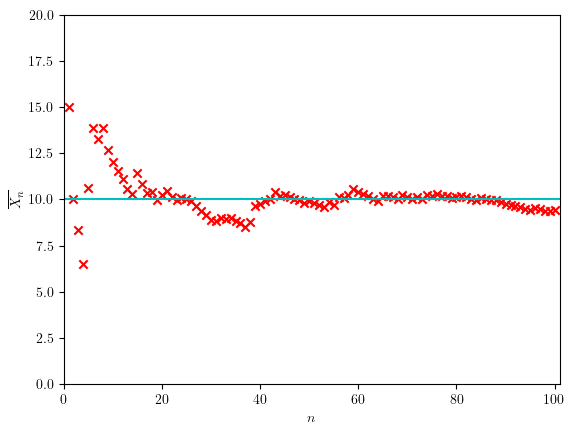

In [17]:
### Correction indicative à supprimer de la version moodle ###

X = range(1,k+1)
Y = moyennes_empiriques(echantillon(k))

m = 1/p

# Permet d'afficher des formules mathématiques en légende
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Computer Modern'
plt.rcParams['text.latex.preamble'] = r'\usepackage{dsfont}'

plt.plot([0,k+1],[m,m],color='c')
plt.scatter(X,Y,color='r',marker='x')
plt.xlim(0,k+1)
plt.ylim(0,2*m)
plt.xlabel('$n$')
plt.ylabel('$\overline{X_n}$')
plt.show()

## 4. Intervalles et estimations via l'inégalité de Bienaymé-Tchebychev

### 4.1 Intervalles de Confiance

On veut dans cet exercice manipuler et afficher des intervalles de confiance.
On a déjà vu ci-avant que la moyenne empirique $\overline{X_n}$ sur une série de tirages *iid* converge
vers la moyenne attendue lorsque $n\to\infty$.
Par exemple, dans le cas de variables de Bernoulli $\mathcal{B}(p)$, on convergera vers le paramètre $p$ en question.
Cela ne nous indique en rien à quelle *vitesse* cette convergence se produit.

C'est là que les intervalles de confiance entrent en jeu.
Considérons ici l'intervalle (aléatoire) $I_n := \left[ \overline{X_n}-\frac{a}{\sqrt{n}},\overline{X_n}+\frac{a}{\sqrt{n}}\right]$.
Dans ce contexte, en remarquant que $p=\mathbb{E}\left[\overline{X_n}\right]$ par linéarité de l'espérance,
l'inégalité de Tchebychev nous donne :
$$
\mathbb{P}\left(I_n\ni p\right) = \mathbb{P}\left(\left|\overline{X_n}-\mathbb{E}\left[\overline{X_n}\right]\right|\leq \frac{a}{\sqrt{n}}\right) \geq 1- \frac{n}{a^2}\text{Var}\left(\overline{X_n}\right) = 1-\frac{\text{Var}\left(X_1\right)}{a^2}
=1-\frac{p(1-p)}{a^2}\geq 1-\frac{1}{4a^2} .
$$

On parle d'intervalle de confiance de niveau $x\%$ lorsque $\mathbb{P}\left(I_n\ni p\right)\geq \frac{x}{100}$.
Ainsi, le choix $a=1$ nous donne ici un intervalle de cofiance de niveau $75\%$ indépendamment du choix de $p$.
Le standard communément accepté en sciences expérimentales est un niveau de confiance à $95\%$:
il faudra ici choisir $a\geq \sqrt{5}\approx 2.24$ pour atteindre ce niveau de confiance.

Cette notion est utile pour de l'estimation de paramètres parmi une famille de modèles. Elle est notamment utilisée dans le cadre de sondages, où les question binaires oui/non impliquent de fait une loi de Bernoulli sur les réponses, par exemple.

**Exercice :**

1. Dans le bloc 1, compléter le code de la fonction `moyenne(n,p)` pour qu'elle retourne la moyenne empirique $\overline{X_n}$ de lois *iid* $\mathcal{B}(p)$.
2. Dans le bloc 2, fixer `p=0.5` représenter graphiquement la suite d'intervalles $\left[Y_n-\frac{\sqrt{5}}{\sqrt{n}},Y_n+\frac{\sqrt{5}}{\sqrt{n}}\right]$, où les variables $Y_n$ sont les moyennes empiriques (indépendantes !) retournées par la fonction `moyenne(n,p)`, pour $n$ allant de $1$ à $50$. On affichera également la droite horizontale d'équation $y=p$. Pour les valeurs de $n$ à considérer on pourra se restreindre aux dizaines jusqu'à $1000$.

In [18]:
### BLOC 1 ###

def moyenne(n,p):
    # Code à compléter
    return moy

In [19]:
### Correction indicative à supprimer de la version moodle ###

def moyenne(n,p):
    moy = np.random.binomial(n,p)/n
    return moy

In [20]:
### BLOC 2 ###

# À vous de jouer.

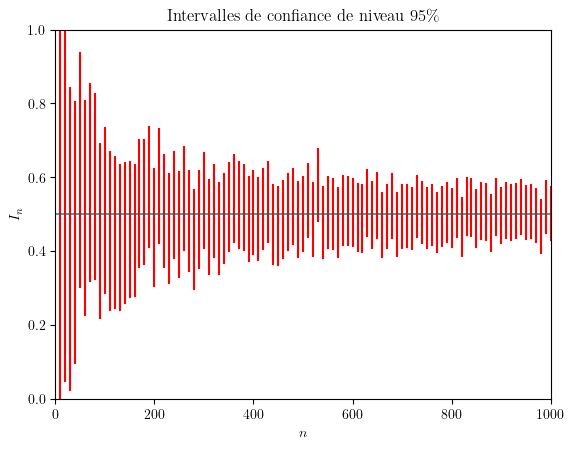

In [21]:
### Correction indicative à supprimer de la version moodle ###

p = 0.5
horizon=1000

a = np.sqrt(5)

X = np.arange(10,horizon+1,10)
Y = [moyenne(n,p) for n in X]

# Permet d'afficher des formules mathématiques en légende
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Computer Modern'
plt.rcParams['text.latex.preamble'] = r'\usepackage{dsfont}'

plt.plot([0,horizon+1],[p,p],color='c')
for n in range(len(X)):
    plt.plot((X[n],X[n]),(Y[n]-a/np.sqrt(X[n]),Y[n]+a/np.sqrt(X[n])),color='r')
plt.xlim(0,horizon+1)
plt.ylim(0,1)
plt.xlabel('$n$')
plt.ylabel('$I_n$')
plt.title('Intervalles de confiance de niveau $95\%$')
plt.show()

On constate graphiquement deux points.

D'une part, la convergence en $\frac{1}{\sqrt{n}}$ est en réalité assez lente, puiqsue pour gagner une décimale de précision il faut multiplier par $100$ la taille de l'échantillon.
Ce comportement est assez intrinsèque aux méthodes d'estimation générales, d'où la nécessité de choisir un bon compromis entre précision (grand échantillon de données) et temps de calcul/génération dudit échantillon.

D'autre part, bien qu'on génère un intervalle au niveau $95\%$, il est virtuellement *impossible* d'observer ici un tirage tel que $p\notin I_n$, et ce même sur plusieurs centaines de réalisations.
Cela vient du fait que l'inégalité de Chebychev est en fait assez large en toute généralité, et ne donne pas de bonnes estimations. En pratique, on utilise plutôt des intervalles de confiance basés sur le TCL (hors-programme, voir exercice bonus).

### 4.2 Intervalles de Fluctuation

L'idée générale des intervalles de confiance est de supposer qu'on connaît la loi de $X$ à un paramètre près, généralement déterminé par $\mathbb{E}[X]$, et d'utiliser une inégalité de concentration autour de la moyenne empirique $\overline{X_n}$ 
(et notamment l'inégalité de Chebychev) pour estimer l'espérance avec une certaine précision.

On peut, en utilisant la même inégalité, adopter un point de vue dual, conjecturer une loi pour la variable $X$, et considérer un intervalle *déterministe* $J_n = \left[p-\frac{1}{\sqrt{n}},p+\frac{1}{\sqrt{n}}\right]$ pour vérifier si l'évènement $\overline{X_n} \in J_n$ est réalisé.
Dans le cas où cet évènement n'est pas réalisé, on peut conclure avec *forte probabilité* que $X$ ne suit pas initialement la loi conjecturée, que notre modèle de départ est inadapté.

Considérons par exemple une succession de 1600 *pile ou face* indépendants mais réalisés avec la même pièce, supposée équilibrée.
Sur ces 1600 tirages, seulement 630 sont tombés du côté *face*.
Cette observation est-elle anormale ?

<details>
<summary><b>Cliquer ici pour afficher la réponse.</b></summary>

On s'attend *a priori* à ce que la pièce soit équilibrée, autrement dit à avoir $p=0.5$.
Dans ce cas, $J_{1600}=\left[\frac{19}{40},\frac{21}{40}\right]$.
On constate que $\overline{X_{1600}}\notin J_{1600}$, ce qui indique avec forte probabilité
que la pièce n'est *pas* équilibrée, que $p\neq 0.5$.
</details>



## 5. Bonus : Constatation empirique du TCL et intervalles de confiance (hors programme)

Le [Théorème Central Limite](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_central_limite) (TCL) est un résultat général de convergence en loi vers une [loi normale](https://fr.wikipedia.org/wiki/Loi_normale) centrée réduite $\mathcal{N}(0,1)$, 
valable pour des variables aléatoires de variance finie.
Ici, la loi normale n'est pas une variable discrète, mais réelle à densité continue.

**Théorème :**

Supposons que les variables $\left(X_n\right)$ sont *iid* d'espérance $\mu$ et de variance finie.
Posons $\sigma_n := \sqrt{\frac{1}{n} \sum_{i=1}^n \left(X_i-\overline{X_n}\right)^2}$ l'écart-type empirique.
Posons $Z_n = \sqrt{n}\times\frac{\overline{X_n}-\mu}{\sigma_n}$.
Alors on a la convergence en loi $Z_n\overset{\mathcal{L}}{\longrightarrow} Z$ avec $Z\sim \mathcal{N}(0,1)$ une gaussienne centrée réduite.

Dans ce contexte, la convergence en loi signifie que pour tous réels $a\leq b$, on a $\mathbb{P}\left(a\leq Z_n\leq b\right) \underset{n\to\infty}{\longrightarrow} \mathbb{P}\left(a\leq Z\leq b\right)$.

**Exercice :**

On se propose de visualiser cette convergence en loi sous la forme d'un histogramme. Pour ce faire, on choisit au préalable une valeur de $n$, disons $n=700$.

1. Définir une fonction `tirage(n,p)` qui retourne un tirage sous la loi $Z_n$ ci-avant, en partant de variables $X_i\sim\mathcal{B}(p)$. Pour ce faire, on pourra commencer par générer un échantillon de taille $n$, puis calculer sa moyenne empirique (avec `np.mean`) et son écart-type empirique (avec `np.std`).
2. Générer un échantillon de $k=3000$ tirages indépendants de la variable $Z_n$.
3. Représenter graphiquement la loi empirique de cet échantillon à l'aide de la fonction `plt.hist` (voir [la documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)).

In [22]:
# À vous de jouer.

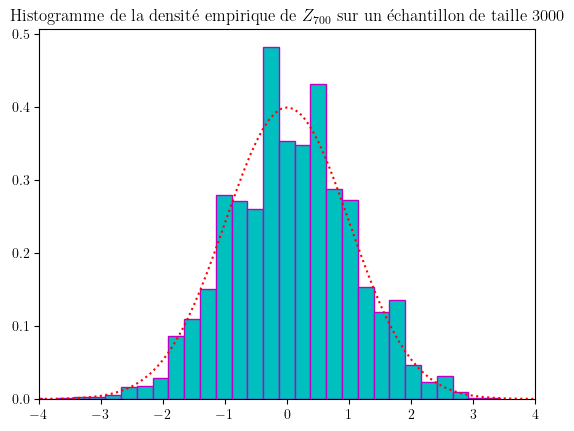

In [23]:
### Correction indicative à supprimer de la version moodle ###

# 1 #

def tirage(n,p):
    L=np.random.binomial(1,p,n)
    return np.sqrt(n)*(np.mean(L)-p)/np.std(L)

# 2 #

n=700
k=3000
p=0.5

sample = [tirage(n,p) for x in range(k)]

# 3 #

plt.xlim(-4,4)
plt.hist(sample,color='c',edgecolor='m',bins=30,density=True)
plt.title('Histogramme de la densité empirique de $Z_{'+str(n)+'}$ sur un échantillon de taille $'+str(k)+'$')

step=0.1
X = np.arange(-4,4+step,step)
plt.plot(X,1/(np.sqrt(2*np.pi))*np.exp(-X**2/2),color='r',linestyle='dotted')

plt.show()

**Exercice :**

On se propose désormais d'exploiter cette convergence en loi pour obtenir de meilleurs intervalles de confiance que dans la section précédente.
Tel quel, le TCL ne donne pas de vitesse de convergence pour $\mathbb{P}\left(a\leq Z_n\leq b\right) \underset{n\to\infty}{\longrightarrow} \mathbb{P}\left(a\leq Z\leq b\right)$. Cette vitesse dépend de la loi des $X_i$, et notamment de leur variance, il faut donc la prendre en compte précautioneusement dans des applications réelles.
Dans le cadre de cet exercice, on va admettre que, pour $n\geq 30$, l'approximmation est de suffisamment bonne qualité,
de sorte que $\mathbb{P}\left(\mu\in\left[\overline{X_n}-\sigma_n\frac{a}{\sqrt{n}},\overline{X_n}+\sigma_n\frac{a}{\sqrt{n}}\right] \right)\approx \mathbb{P}(|Z|\leq a)$.

On admettra alors que pour une gaussienne centrée réduite $Z$, $a=2$ suffit à garantir un niveau de confiance de $95\%$.

In [24]:
# À vous de jouer.

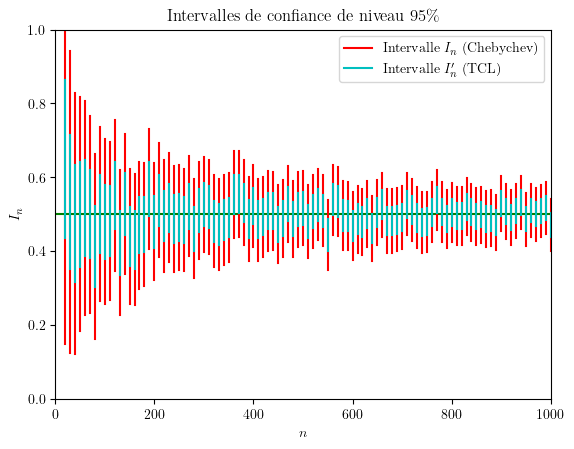

In [25]:
### Correction indicative à supprimer de la version moodle ###

p = 0.5
horizon=1000

a = np.sqrt(5)
b = 2

X = np.arange(10,horizon+1,10)

Y = []
S = []

for n in X:
    L=np.random.binomial(1,p,n)
    Y.append(np.mean(L))
    S.append(np.std(L))

# Permet d'afficher des formules mathématiques en légende
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Computer Modern'
plt.rcParams['text.latex.preamble'] = r'\usepackage{dsfont}'

plt.plot([0,horizon+1],[p,p],color='g')

for n in range(1,2):
    plt.plot((X[n],X[n]),(Y[n]-a/np.sqrt(X[n]),Y[n]+a/np.sqrt(X[n])),color='r',label='Intervalle $I_n$ (Chebychev)')
    plt.plot((X[n],X[n]),(Y[n]-b*S[n]/np.sqrt(X[n]),Y[n]+b*S[n]/np.sqrt(X[n])),color='c',label='''Intervalle $I_n'$ (TCL)''')

for n in range(2,len(X)):
    plt.plot((X[n],X[n]),(Y[n]-a/np.sqrt(X[n]),Y[n]+a/np.sqrt(X[n])),color='r')
    plt.plot((X[n],X[n]),(Y[n]-b*S[n]/np.sqrt(X[n]),Y[n]+b*S[n]/np.sqrt(X[n])),color='c')

plt.title('Intervalles de confiance de niveau $95\%$')
plt.xlim(0,horizon+1)
plt.ylim(0,1)
plt.xlabel('$n$')
plt.ylabel('$I_n$')
plt.legend()
plt.show()

On peut ainsi constater, en superposant les intervalles à $95\%$ données par l'inégalité de Chebychev et l'approximation gaussienne, que les seconds sont systématiquement plus petits, et correspondent de façon bien plus proche au seuil de $95\%$ annoncé puisque on peut observer à l'œil nu de (rares) instances d'intervalles qui ne contiennent pas la valeur $p=0.5$ attendue.

$\mathcal{FIN}$